In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import wfdb

In [17]:
import seaborn as sns
sns.set("paper")

In [18]:
# df = pd.read_csv("./data/sample_data.csv")
signal, fields = wfdb.rdsamp("./mitdb/100")
ann = wfdb.rdann("./mitdb/100","atr")
ann_index = ann.sample
ann_values = ann.symbol

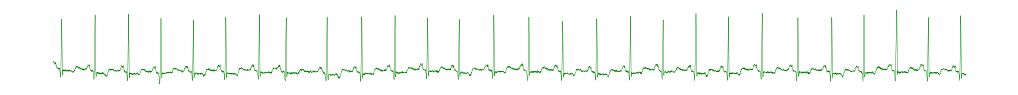

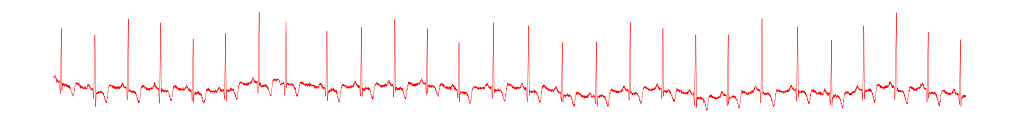

In [19]:
## to save figures

# plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)




fig = plt.figure(figsize=(18,1.5))
plt.axis("off")
plt.plot(signal[:,0][0:8000], linewidth=0.4, color="green")
plt.show()


fig = plt.figure(figsize=(18,2))
plt.axis("off")
plt.plot(signal[:,1][0:8000], linewidth=0.4, color="red")


In [20]:
## low pass and high pass filters

from scipy.signal import butter, lfilter #Import the extra module required
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

iltered = butter_lowpass_filter(signal[:,1][0:8000], 15, 360, 5)#filter the signal with a cutoff at 40Hz and a 5th order Butterworth filter

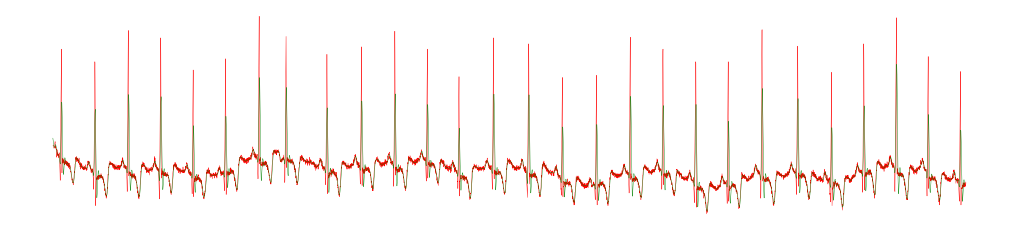

In [21]:
fig = plt.figure(figsize=(18,4))
plt.axis("off")
plt.plot(signal[:,1][0:8000], linewidth=0.4, color="red")
plt.plot(iltered[10:8000], linewidth=0.4, color="green")
plt.show()

## Doing for per beats

In [22]:
normal_beats = []
for i in ann_index:
    normal_beats.append(signal[:,1][i-120:i+130])

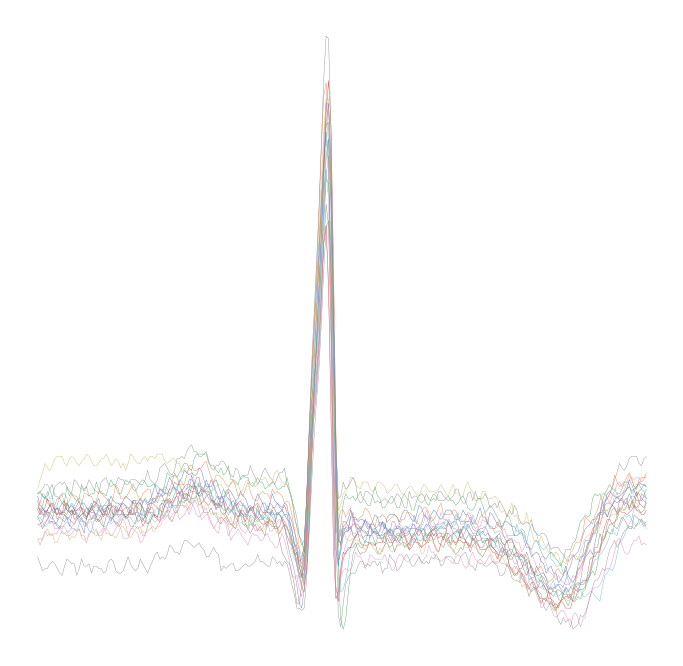

In [23]:
fig = plt.figure(figsize=(12,12))
plt.axis("off")
for i in range(20):
    plt.plot(normal_beats[i], linewidth=0.4)
plt.show()

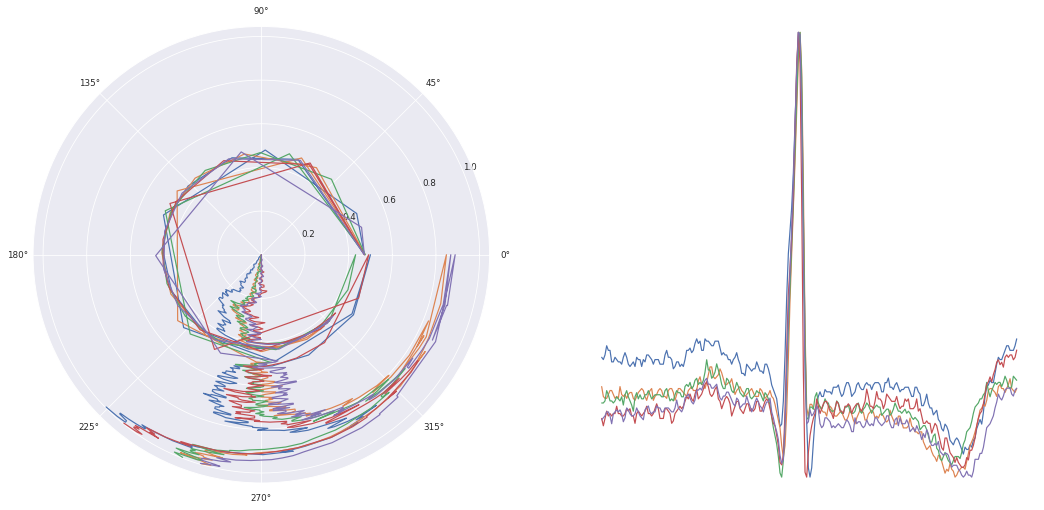

In [24]:
## circulat plots
import math

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122)


scaler = MinMaxScaler(feature_range=(-1, 1))

for i in range(2,5):
    data = scaler.fit_transform(normal_beats[i].reshape(-1, 1))
    ax1.plot([2*math.acos(x[0]) for x in data], [x/len(data) for x in range(len(data))]) 
    ax2.plot(data)
    
for i in range(6,8):
    data = scaler.fit_transform(normal_beats[i].reshape(-1, 1))
    ax1.plot([2*math.acos(x[0]) for x in data], [x/len(data) for x in range(len(data))]) 
    ax2.plot(data)
    
plt.axis("off")  
plt.show()

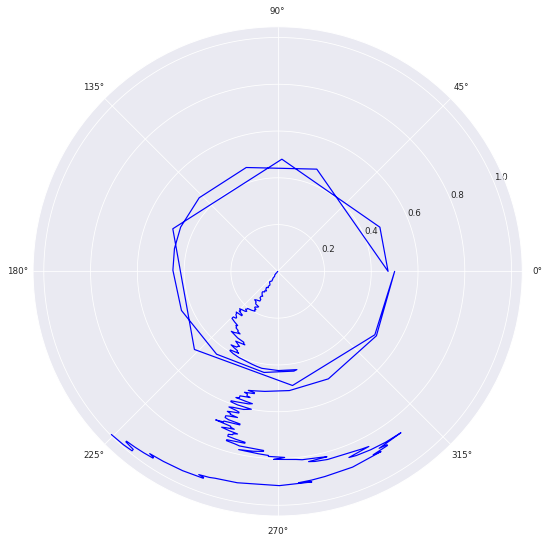

In [25]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(111, projection='polar')
data = scaler.fit_transform(normal_beats[2].reshape(-1, 1))
ax1.plot([2*math.acos(x[0]) for x in data], [x/len(data) for x in range(len(data))], color="blue") 
# ax1.axis("off")
# plt.savefig("dummy_file.png", dpi=1200,
#         orientation='portrait', papertype=None, format=None,
#         transparent=True, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)
plt.show()

NameError: name 'measure' is not defined

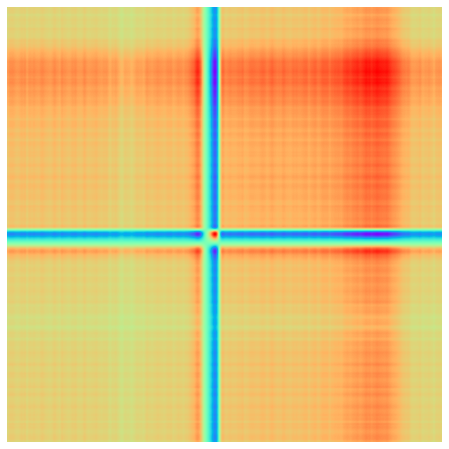

In [26]:
fig = plt.figure(figsize=(8,8))
data = scaler.fit_transform(normal_beats[1+2].reshape(-1, 1))
val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
plt.imshow(val,interpolation="spline36", cmap='rainbow', origin='lower')
plt.axis('off')
contours = measure.find_contours(val,0.01)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
plt.savefig("dummy_file.png", dpi=1200,
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        data = scaler.fit_transform(normal_beats[n+2].reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        plt.imshow(val, cmap='rainbow', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        filtered = butter_lowpass_filter(normal_beats[n+2], 40, 360, 5)
        data = scaler.fit_transform(filtered.reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        plt.imshow(val, cmap='rainbow', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
im = ax.imshow(val, interpolation='spline36', cmap="rainbow",
               origin='lower')
plt.axis('off')
plt.show()

In [ ]:
from skimage import measure
from skimage.color import rgb2gray

# grayscale = rgb2gray(val)
contours = measure.find_contours(val,0.1)

fig, ax = plt.subplots()
ax.imshow(val, cmap="rainbow")

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
a[0:a.size:3]

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        data = scaler.fit_transform(normal_beats[n+2][0:260:n+1].reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        plt.imshow(val, cmap='rainbow', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        data = scaler.fit_transform(normal_beats[n+2][0:260:n+1].reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        plt.imshow(val, cmap='rainbow', interpolation='spline36', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        data = scaler.fit_transform(normal_beats[n+2][0:260:n+1].reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        
        contours = measure.find_contours(val,0.01)

        for n, contour in enumerate(contours):
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            
        plt.imshow(val, cmap='gray', interpolation='spline36', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()

In [ ]:
def show_batch():
    plt.figure(figsize=(18,18))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        filtered = butter_lowpass_filter(normal_beats[n+2], 20, 360, 5)#filter the signal with a cutoff at 40Hz and a 5th order Butterworth filter
        data = scaler.fit_transform(filtered[0:260:n+1].reshape(-1, 1))
        val = data.T*data - np.sqrt(np.absolute(np.ones(len(data)) - data.T * data)).T * np.sqrt(np.absolute(np.ones(len(data)) - data.T * data))
        
        contours = measure.find_contours(val,0.01)

        for n, contour in enumerate(contours):
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            
        plt.imshow(val, cmap='rainbow', interpolation='spline36', origin='lower')
        plt.title("Normal beat "+str(n))
        plt.axis('off')
show_batch()